# Draw maps for sce

In [2]:
import contextily as ctx
import geopandas
import matplotlib.pyplot as plt
import pandas as pd

## Read files

In [ ]:
# Import England LSAO Shape file (use 'zip://'' prefix for zip files)
filename = "zip://./Lower_layer_super_output_areas_(E+W)_2011_Boundaries_(Generalised_Clipped)_V2.zip"
lsoa_gdf = geopandas.read_file(filename, crs='EPSG:27700')
data = pd.read_csv('default_scenario.csv')


In [36]:
# Add net benefit column
prop_nlvo = 0.7
prop_lvo = 1 - prop_nlvo

# Utility

data['drip_ship_utility_shift'] = (
    (data['nlvo_drip_ship_ivt_utility_shift'] * prop_nlvo) +
    (data['lvo_drip_ship_ivt_mt_utility_shift'] * prop_lvo))

data['mothership_utility_shift'] = (
    (data['nlvo_mothership_ivt_utility_shift'] * prop_nlvo) +
    (data['lvo_mothership_ivt_mt_utility_shift'] * prop_lvo))

data['msu_utility_shift'] = (
    (data['nlvo_msu_ivt_utility_shift'] * prop_nlvo) +
    (data['lvo_msu_ivt_mt_utility_shift'] * prop_lvo))

data['msu_net_utility_benefit'] = data['msu_utility_shift'] - data['drip_ship_utility_shift']

# Get proportions mRS 0-2 for each scenario
data['drip_ship_mrs_0-2'] = (
    (data['nlvo_drip_ship_ivt_mrs_0-2'] * prop_nlvo) +
    (data['lvo_drip_ship_mt_mrs_0-2'] * prop_lvo))

data['mothership_mrs_0-2'] = (
    (data['nlvo_mothership_ivt_mrs_0-2'] * prop_nlvo) +
    (data['lvo_mothership_ivt_mt_mrs_0-2'] * prop_lvo))

data['msu_mrs_0-2'] = (
    (data['nlvo_msu_ivt_mrs_0-2'] * prop_nlvo) +
    (data['lvo_msu_ivt_mt_mrs_0-2'] * prop_lvo))

data['msu_mrs_0-2_benefit'] = data['msu_mrs_0-2'] - data['drip_ship_mrs_0-2']

data['nlvo_msu_ivt_utility_benefit'] = data['nlvo_msu_ivt_utility'] - data['nlvo_drip_ship_ivt_utility']
data['lvo_msu_ivt_utility_benefit'] = data['lvo_msu_ivt_utility'] - data['lvo_drip_ship_ivt_utility']
data['lvo_msu_ivt_mt_utility_benefit'] = data['lvo_msu_ivt_mt_utility'] - data['lvo_drip_ship_ivt_mt_utility']
data['nlvo_msu_ivt_mrs_0-2_benefit'] = data['nlvo_msu_ivt_mrs_0-2'] - data['nlvo_drip_ship_ivt_mrs_0-2']
data['lvo_msu_ivt_mrs_0-2_benefit'] = data['lvo_msu_ivt_mrs_0-2'] - data['lvo_drip_ship_ivt_mrs_0-2']
data['lvo_msu_ivt_mt_mrs_0-2_benefit'] = data['lvo_msu_ivt_mt_mrs_0-2'] - data['lvo_drip_ship_ivt_mt_mrs_0-2']

In [30]:
list(data)

['LSOA11CD',
 'LSOA11NM',
 'LSOA11NMW',
 'geometry',
 'LSOA',
 'nearest_ivt_unit',
 'nearest_ivt_time',
 'nearest_mt_unit',
 'nearest_mt_time',
 'transfer_unit',
 'transfer_required',
 'transfer_time',
 'nearest_msu_unit',
 'nearest_msu_time',
 'Admissions',
 'England',
 'drip_ship_ivt_time',
 'drip_ship_mt_time',
 'nlvo_no_treatment_mrs_0-2',
 'nlvo_no_treatment_utility',
 'lvo_no_treatment_mrs_0-2',
 'lvo_no_treatment_utility',
 'nlvo_drip_ship_ivt_mrs_0-2',
 'nlvo_drip_ship_ivt_mrs_shift',
 'nlvo_drip_ship_ivt_utility',
 'nlvo_drip_ship_ivt_utility_shift',
 'lvo_drip_ship_ivt_mrs_0-2',
 'lvo_drip_ship_ivt_mrs_shift',
 'lvo_drip_ship_ivt_utility',
 'lvo_drip_ship_ivt_utility_shift',
 'lvo_drip_ship_mt_mrs_0-2',
 'lvo_drip_ship_mt_mrs_shift',
 'lvo_drip_ship_mt_utility',
 'lvo_drip_ship_mt_utility_shift',
 'lvo_drip_ship_ivt_mt_mrs_0-2',
 'lvo_drip_ship_ivt_mt_mrs_shift',
 'lvo_drip_ship_ivt_mt_utility',
 'lvo_drip_ship_ivt_mt_utility_shift',
 'mothership_ivt_time',
 'mothership_mt_ti

In [29]:
# Merge the data with the LSOA shapefile
data = lsoa_gdf.merge(data, left_on='LSOA11NM', right_on='LSOA', how='right')

In [16]:
hospitals_gdf = geopandas.read_file('stroke_hospitals.csv')
hospitals_gdf.geometry = geopandas.points_from_xy(
        hospitals_gdf.long, hospitals_gdf.lat)
# Set crs for geometry, using epsg4326 for lat/long
hospitals_gdf = hospitals_gdf.set_crs(epsg=4326)
hospitals_gdf.head()

,Postcode,Hospital_name,Use_IVT,Use_MT,Use_MSU,Country,Strategic Clinical Network,Health Board / Trust,Stroke Team,SSNAP name,...,ivt_rate,Easting,Northing,long,lat,Neuroscience,30 England Thrombectomy Example,hospital_city,Notes,geometry
0,RM70AG,RM70AG,1,1,1,England,London SCN,Barking,Havering and Redbridge University Hospitals N...,Queens Hospital Romford HASU,...,11.9,551118,187780,0.179030640661934,51.5686465521504,1,0,Romford,,POINT (0.17903 51.56865)
1,E11BB,E11BB,1,1,1,England,London SCN,Barts Health NHS Trust,The Royal London Hospital,Royal London Hospital HASU,...,13.4,534829,181798,-0.0581329916047372,51.5190178361295,1,1,Royal London,,POINT (-0.05813 51.51902)
2,SW66SX,SW66SX,1,1,1,England,London SCN,Imperial College Healthcare NHS Trust,"Charing Cross Hospital, London",Charing Cross Hospital HASU,...,9.9,524226,176487,-0.212736111308184,51.4737165811988,1,1,Charing Cross,,POINT (-0.21274 51.47372)
3,SE59RW,SE59RW,1,1,1,England,London SCN,King's College Hospital NHS Foundation Trust,"King's College Hospital, London",King's College Hospital HASU,...,15,532536,176228,-0.0932514945350423,51.4695052907757,1,0,Kings College,,POINT (-0.09325 51.46951)
4,BR68ND,BR68ND,1,0,0,England,London SCN,King's College Hospital NHS Foundation Trust,Princess Royal University Hospital,Princess Royal University Hospital HASU,...,13.3,543443,165032,0.0591464390000555,51.3662434074157,0,0,Princess Royal,,POINT (0.05915 51.36624)


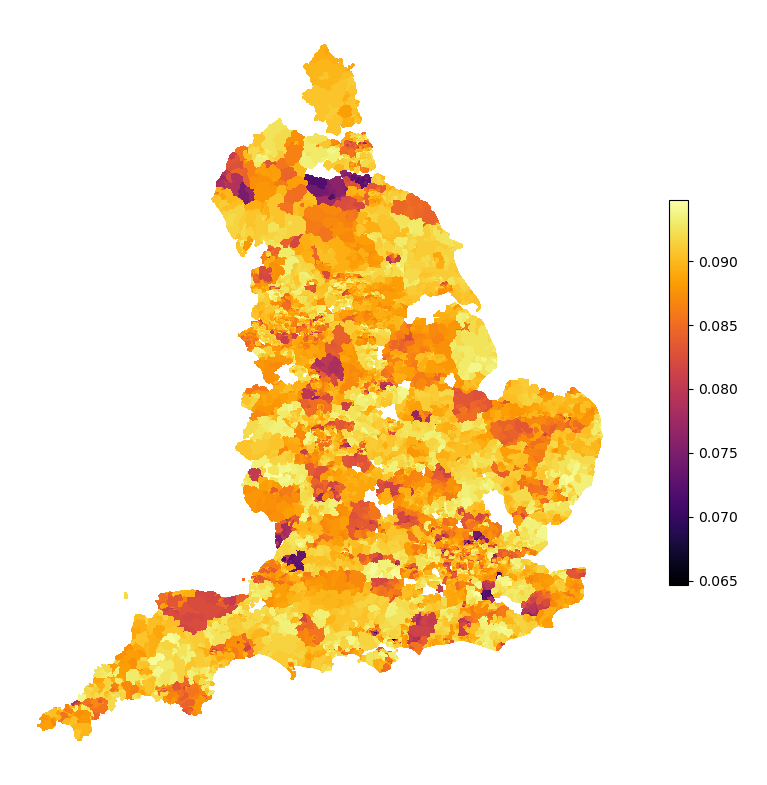

In [44]:
fig, ax = plt.subplots(figsize=(10, 10)) # Make max dimensions 10x10 inch
data.plot(ax=ax, # Set which axes to use for plot (only one here)
                 column='nlvo_drip_ship_ivt_utility_shift', # Column to apply colour
                 antialiased=False, # Avoids artifact boundry lines
                 edgecolor='face', # Make LSOA boundry same colour as area
                 #vmin=0, # Manual scale min (remove to make automatic)
                 #vmax=0.05, # Manual scale max (remove to make automatic)
                 cmap='inferno', # Colour map to use
                 # Adjust size of colourmap key, and add label
                 legend_kwds={'shrink':0.5, 'label':' '},
                 # Set to display legend
                 legend=True,
                 # Make slightly transparent
                 alpha=1.0)
ax.set_axis_off() # Turn of axis linea dn numbers



"""
# Add base map (note that we specifiy thr same CRS as we are using)
# Use manual zoom to adjust level of detail of base map
ctx.add_basemap(ax, 
                source=ctx.providers.OpenStreetMap.Mapnik,zoom=10)
    
ax.set_axis_off() # Turn of axis line numbers
ax.set_title('Travel time (minutes) to closest acute stroke unit')
# Adjust for printing
ax.margins(0)
ax.apply_aspect()
plt.subplots_adjust(left=0.01, right=1.0, bottom=0.0, top=1.0)
"""

plt.savefig('map.jpg', dpi=300) # Save figure
plt.show()